# 加载数据


使用openpyxl引擎

In [1]:
import pandas as pd
df = pd.read_excel('data.xlsx', engine='openpyxl')
df

,客户是否流失,过去一年进店次数（Total no internal）,全网-过去一年进店次数（Total no internal）,车系,车型,车龄,车龄（天）,是否NEV/PHEV,里程,单位里程消费金额,...,全网历史进店次数（机油保养）,全网历史进店次数（internal）,全网历史进店消费（Total no internal）,全网历史进店消费（客户付费）,全网历史进店消费（保险）,全网历史进店消费（保修）,全网历史进店消费（Total）,全网历史进店消费（BSI）,全网历史进店消费（机油保养）,全网历史进店消费（internal）
0,N,1.0,1.0,X1,X1 20LI,3,1095,N,15599,0.42,...,NaN,1,6549.17,NaN,6549.17,NaN,6549.17,NaN,NaN,0.00
1,Y,0.0,2.0,3 Series,320I A,13,4745,N,100236,1.03,...,12.0,10,107439.66,45864.20,60918.57,656.89,108840.54,NaN,4406.94,1400.88
2,N,0.0,0.0,3 Series,320I A,7,2555,N,32989,0.75,...,1.0,0,24695.27,1139.73,18304.09,5251.45,24695.27,NaN,700.09,NaN
3,N,1.0,1.0,5 Series,523I A,10,3650,N,115782,0.71,...,10.0,6,81849.41,59816.16,21176.39,856.86,83028.25,NaN,7191.39,1178.84
4,Y,0.0,0.0,X1,X1 20LI,3,1095,N,9398,0.03,...,1.0,0,824.97,537.87,NaN,287.10,824.97,NaN,729.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,NaN,0.0,0.0,X1,X20I A,10,3650,N,86310,0.62,...,9.0,5,53491.36,10463.18,39806.59,3221.59,55607.31,NaN,3706.52,2115.95
33875,NaN,0.0,1.0,3 Series,320I A,2,730,N,7519,0.05,...,1.0,1,350.90,0.00,NaN,350.90,1331.07,NaN,816.47,980.17
33876,NaN,1.0,1.0,X3,X3 20I A,7,2555,N,34567,0.06,...,6.0,5,2051.15,1122.21,NaN,928.94,5470.58,NaN,2996.20,3419.43
33877,NaN,0.0,2.0,3 Series,330I A,4,1460,N,24145,0.36,...,3.0,3,18488.42,2042.36,15601.96,844.10,21120.40,NaN,2161.57,2631.98


## 处理字段


处理名义变量

In [2]:
data = df.drop(columns=[
  '车系', '车型', '是否NEV/PHEV', '最后一次进店经销商是否与本店相同', '最后一次进店车牌号',
  '保修起始日期','最后一次全网进店日期', '本店最后一次进店日期',
  '最后一次进店是否做了客户付费项目',
  '最后一次进店是否做了保险项目',
  '最后一次进店是否做了保修项目',
  '最后一次进店是否做了BSI项目',
  '最后一次进店是否做了机油保养项目',
  '最后一次进店是否做了内部项目',
]).fillna(0)[0:4999]
data['客户是否流失'] = data['客户是否流失'].replace({'N':0, 'Y':1})
data

,客户是否流失,过去一年进店次数（Total no internal）,全网-过去一年进店次数（Total no internal）,车龄,车龄（天）,里程,单位里程消费金额,单位时间消费金额,非保养清洗类消费,距离下一次续保天数,...,全网历史进店次数（机油保养）,全网历史进店次数（internal）,全网历史进店消费（Total no internal）,全网历史进店消费（客户付费）,全网历史进店消费（保险）,全网历史进店消费（保修）,全网历史进店消费（Total）,全网历史进店消费（BSI）,全网历史进店消费（机油保养）,全网历史进店消费（internal）
0,0,1.0,1.0,3,1095,15599,0.42,2183.06,0.00,211.0,...,0.0,1,6549.17,0.00,6549.17,0.00,6549.17,0.0,0.00,0.00
1,1,0.0,2.0,13,4745,100236,1.03,7952.19,12867.26,211.0,...,12.0,10,107439.66,45864.20,60918.57,656.89,108840.54,0.0,4406.94,1400.88
2,0,0.0,0.0,7,2555,32989,0.75,3527.90,700.09,96.0,...,1.0,0,24695.27,1139.73,18304.09,5251.45,24695.27,0.0,700.09,0.00
3,0,1.0,1.0,10,3650,115782,0.71,8184.94,14631.20,115.0,...,10.0,6,81849.41,59816.16,21176.39,856.86,83028.25,0.0,7191.39,1178.84
4,1,0.0,0.0,3,1095,9398,0.03,95.70,0.00,331.0,...,1.0,0,824.97,537.87,0.00,287.10,824.97,0.0,729.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,3.0,3.0,3,1095,67167,0.42,9510.35,1920.75,168.0,...,6.0,1,29200.95,14910.27,13620.78,669.90,29200.95,0.0,4063.26,0.00
4995,1,0.0,0.0,5,1825,47163,0.24,2271.13,780.34,57.0,...,1.0,1,28170.32,2057.89,21088.19,5024.24,28170.32,0.0,780.34,0.00
4996,0,1.0,1.0,1,365,10,38.28,382.80,2458.41,48.0,...,0.0,1,382.80,0.00,0.00,382.80,12152.71,0.0,0.00,11769.91
4997,1,0.0,3.0,6,2190,31124,1.27,6563.97,2189.35,299.0,...,5.0,2,47531.99,13167.61,32633.70,1730.68,47795.72,0.0,3482.73,263.73


### 拆分测试训练数据


总共5000条数据，4000条用来做训练以及测试


留下1000条做最后的预测

In [3]:
from sklearn.model_selection import train_test_split

data_train = data[0:3999]
data_test = data[4000:]

X_train, X_test, y_train, y_test = train_test_split( data_train.drop(columns=['客户是否流失']), data_train['客户是否流失'])
X_train

,过去一年进店次数（Total no internal）,全网-过去一年进店次数（Total no internal）,车龄,车龄（天）,里程,单位里程消费金额,单位时间消费金额,非保养清洗类消费,距离下一次续保天数,售价维度得分,...,全网历史进店次数（机油保养）,全网历史进店次数（internal）,全网历史进店消费（Total no internal）,全网历史进店消费（客户付费）,全网历史进店消费（保险）,全网历史进店消费（保修）,全网历史进店消费（Total）,全网历史进店消费（BSI）,全网历史进店消费（机油保养）,全网历史进店消费（internal）
3363,0.0,0.0,3,1095,10707,0.07,242.60,158.80,148.0,3.0,...,1.0,1,727.81,440.71,0.00,287.10,1635.71,0.00,744.17,907.90
1342,0.0,0.0,5,1825,35059,0.44,3071.49,419.47,280.0,4.0,...,2.0,4,15357.47,9.48,0.00,15347.99,15993.73,0.00,636.26,636.26
1860,0.0,0.0,9,3285,66424,1.51,11155.69,4606.95,350.0,3.0,...,6.0,4,100401.23,31624.12,36324.75,32452.36,103348.13,0.00,3100.65,2946.90
1872,1.0,1.0,10,3650,162155,0.35,5689.71,11239.68,111.0,4.0,...,7.0,8,56897.14,13757.02,20077.73,7634.11,67480.53,15428.28,1669.70,10583.39
1525,1.0,2.0,3,1095,36499,0.16,1891.17,723.98,117.0,3.0,...,3.0,0,10927.94,3001.29,4080.12,287.10,10927.94,3559.43,2257.15,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,0.0,3.0,6,2190,159785,0.08,2113.09,3475.76,204.0,4.0,...,14.0,16,130772.31,42289.77,75516.91,12965.63,134110.35,0.00,5146.16,3338.04
3857,2.0,3.0,1,365,12283,3.84,47218.16,2545.85,82.0,4.0,...,1.0,1,47600.96,2970.33,44247.83,382.80,47600.96,0.00,2094.52,0.00
1479,0.0,0.0,5,1825,52136,0.44,4589.34,1383.03,192.0,2.0,...,4.0,4,22946.68,859.46,14690.75,7396.47,24914.92,0.00,1704.51,1968.24
872,3.0,3.0,4,1460,40564,0.25,2516.87,2162.23,346.0,4.0,...,3.0,2,10067.49,2794.15,0.00,7273.34,12128.23,0.00,2521.40,2060.74


In [4]:
y_train

3363    0
1342    0
1860    0
1872    0
1525    0
       ..
3944    1
3857    0
1479    0
872     0
3640    0
Name: 客户是否流失, Length: 2999, dtype: int64

## 构建模型


svm模型


按照默认数据开始训练

In [5]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 测试模型


用测试数据来验证模型准确率

In [6]:
clf.score(X_test, y_test)

0.734

## 预测


训练好模型之后，用1000条数据做预测

In [7]:
pre_y = clf.predict(data_test.drop(columns=['客户是否流失']))
data_test['预测结果'] = pre_y
data_test

c:\Users\Thales\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,客户是否流失,过去一年进店次数（Total no internal）,全网-过去一年进店次数（Total no internal）,车龄,车龄（天）,里程,单位里程消费金额,单位时间消费金额,非保养清洗类消费,距离下一次续保天数,...,全网历史进店次数（internal）,全网历史进店消费（Total no internal）,全网历史进店消费（客户付费）,全网历史进店消费（保险）,全网历史进店消费（保修）,全网历史进店消费（Total）,全网历史进店消费（BSI）,全网历史进店消费（机油保养）,全网历史进店消费（internal）,预测结果
4000,0,2.0,2.0,4,1460,83429,0.18,3710.15,682.06,238.0,...,6,14840.58,2737.91,0.00,12102.67,20339.11,0.00,2576.63,5498.53,0
4001,0,2.0,2.0,9,3285,152966,0.80,13595.50,20462.41,74.0,...,11,122359.49,105265.39,17094.10,0.00,128947.31,0.00,6481.82,6587.82,0
4002,0,2.0,3.0,1,365,10632,0.13,1349.68,3325.39,124.0,...,1,8429.44,0.00,7079.76,319.00,20199.35,1030.68,866.98,11769.91,0
4003,0,1.0,1.0,1,365,0,0.00,319.00,8302.12,216.0,...,1,319.00,0.00,0.00,319.00,12089.49,0.00,0.00,11770.49,0
4004,0,0.0,2.0,3,1095,50089,0.02,375.97,0.00,31.0,...,0,10748.79,9238.09,0.00,1510.70,10748.79,0.00,3184.80,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,3.0,3.0,3,1095,67167,0.42,9510.35,1920.75,168.0,...,1,29200.95,14910.27,13620.78,669.90,29200.95,0.00,4063.26,0.00,0
4995,1,0.0,0.0,5,1825,47163,0.24,2271.13,780.34,57.0,...,1,28170.32,2057.89,21088.19,5024.24,28170.32,0.00,780.34,0.00,0
4996,0,1.0,1.0,1,365,10,38.28,382.80,2458.41,48.0,...,1,382.80,0.00,0.00,382.80,12152.71,0.00,0.00,11769.91,0
4997,1,0.0,3.0,6,2190,31124,1.27,6563.97,2189.35,299.0,...,2,47531.99,13167.61,32633.70,1730.68,47795.72,0.00,3482.73,263.73,0


## 输出文件


输出文件到predication.xlsx

In [8]:
from sklearn.metrics import accuracy_score, recall_score

data_test.to_excel('predication.xlsx')
accuracy_score(data_test['客户是否流失'], data_test['预测结果'])

0.7517517517517518

## 多次预测


更改训练集和测试集合，多次预测



### svm的核


核函数对比，发现默认的rbf效果好一些

<AxesSubplot:>

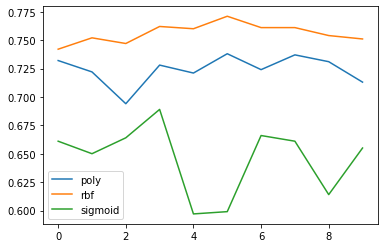

In [32]:
def svm_kernel_score(origin_data, group = 10):
  scorelist = pd.DataFrame(columns=['poly', 'rbf', 'sigmoid'])
  # linear = svm.SVC(kernel='linear')
  poly = svm.SVC(kernel='poly')
  rbf = svm.SVC(kernel='rbf')
  sigmoid = svm.SVC(kernel='sigmoid')
  # precomputed = svm.SVC(kernel='precomputed')
  for n in range(group):
    X_train, X_test, y_train, y_test = train_test_split(origin_data.drop(columns=['客户是否流失']), origin_data['客户是否流失'], random_state=n)
    # linear.fit(X_train, y_train)
    poly.fit(X_train, y_train)
    rbf.fit(X_train, y_train)
    sigmoid.fit(X_train, y_train)
    # precomputed.fit(X_train, y_train)
    scorelist = scorelist.append({
      # 'linear' :linear.score(X_test, y_test),
      'poly' :poly.score(X_test, y_test),
      'rbf' :rbf.score(X_test, y_test),
      'sigmoid' :sigmoid.score(X_test, y_test),
      # 'precomputed' :precomputed.score(X_test, y_test)
      }, ignore_index=True)
  return scorelist

accuracy_data =  svm_kernel_score(data_train, 10)
accuracy_data.plot()

### 更改其他模型测试


比如决策树，神经网络，SGD

c:\Users\Thales\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Users\Thales\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Users\Thales\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Users\Thales\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't co

<AxesSubplot:>

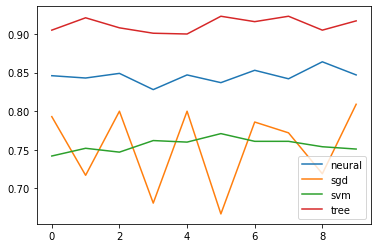

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
def models_score(origin_data, group = 10):
  scorelist = pd.DataFrame()
  models = {
    'svm': svm.SVC(),
    'tree': DecisionTreeClassifier(),
    'neural': MLPClassifier(random_state=1, max_iter=300),
    'sgd': SGDClassifier(max_iter=1000, tol=1e-3)
  }
  for n in range(group):
    X_train, X_test, y_train, y_test = train_test_split(origin_data.drop(columns=['客户是否流失']), origin_data['客户是否流失'], random_state=n)
    row = {}
    for key, model in models.items():
      # print(key, model)
      model.fit(X_train, y_train)
      row[key] = model.score(X_test, y_test)
    scorelist = scorelist.append(row, ignore_index=True)
  return scorelist

accuracy_data =  models_score(data_train, 10)
accuracy_data.plot()